<a href="https://colab.research.google.com/github/Whereamiactually/lyceumcompling11/blob/main/Text_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выравнивание текста

Решение Сергея Аверкиева. Подробнее про выравнивание текста от этого автора можно посмотреть [тут](https://habr.com/ru/articles/517226/) (собственно, откуда я взяла код) и [тут](https://habr.com/ru/articles/704958/). И вообще, у этого автора очень много крутых статей (в том числе про GPT (Generative Pre-trained Transformer), лингвистику и прочее), которые можно посмотреть вот [тут](https://habr.com/ru/users/averkij/publications/articles/).

In [ ]:
!pip3 install razdel
!pip3 install sentence-transformers

Для этой задачи используется векторное представление текста (**SentenceTransformer**). Подрообнее об этой библиотеке можно почитать [тут](https://pypi.org/project/sentence-transformers/).

In [4]:
import re
import seaborn as sns # библиотека для визуализации статистических данных
import numpy as np

from scipy import spatial # библиотека для математических вычислений
from matplotlib import pyplot as plt

import razdel
from sentence_transformers import SentenceTransformer

# Входные тексты

In [8]:
#@title German text
text_de = """Der Himmel war gelb wie Messing und noch nicht
verqualmt vom Rauch der Schornsteine. Hinter den
Dächern der Fabrik leuchtete er sehr stark. Die Sonne
mußte gleich aufgehen. Ich sah nach der Uhr. Es war noch
vor acht. Eine Viertelstunde zu früh.
Ich schloß das Tor auf und machte die Benzinpumpe
fertig. Um diese Zeit kamen immer schon ein paar Wagen
vorbei, die tanken wollten. Plötzlich hörte ich hinter mir ein
heiseres Krächzen, das klang, als ob unter der Erde ein
rostiges Gewinde hochgedreht würde. Ich blieb stehen und
lauschte. Dann ging ich über den Hof zurück zur Werkstatt
und machte vorsichtig die Tür auf. In dem halbdunklen
Raum taumelte ein Gespenst umher. Es trug ein
schmutziges weißes Kopftuch, eine blaue Schürze, dicke
Pantoffeln, schwenkte einen Besen, wog neunzig Kilo und
war die Scheuerfrau Mathilde Stoß.
Ich blieb eine Weile stehen und sah ihr zu. Sie hatte die
Grazie eines Nilpferdes, wie sie da zwischen den
Autokühlern hin und her torkelte und mit dumpfer Stimme
das Lied vom treuen Husaren sang. Auf dem Tisch am
Fenster standen zwei Kognakflaschen. Eine davon war fast
leer. Am Abend vorher war sie voll gewesen. Ich hatte
vergessen, sie einzuschließen.
»Aber Frau Stoß«, sagte ich.
Der Gesang brach ab. Der Besen fiel zu Boden. Das selige
Grinsen erlosch. Jetzt war ich das Gespenst. »Jesus
Christus«, stammelte Mathilde und starrte mich aus roten
Augen an. »Ihnen hab' ich noch nich erwartet...«
»Kann ich verstehen. Hat's geschmeckt?«
»Das ja – aber's is mir peinlich.« Sie wischte sich über den
Mund. »Direkt platt bin ich...«
»Na, das ist nun eine Übertreibung. Sie sind nur voll. Voll
wie eine Strandhaubitze.«
Sie hielt sich mühsam aufrecht. Ihr Schnurrbart zuckte,
und ihre Augenlider klapperten wie bei einem alten Uhu.
Aber allmählich gelang es ihr, klarer zu werden.
Entschlossen trat sie einen Schritt vor. »Herr Lohkamp –
Mensch is nur Mensch – erst hab' ich nur dran gerochen –
und dann einen Schluck genommen – weil mir im Magen
doch immer so flau is – ja, und dann – dann muß mir der
Satan geritten haben. Man soll ein armes Weib auch nicht in
Versuchung führen und die Pulle stehenlassen.«
Es war nicht das erstemal, daß ich sie so traf. Sie kam jeden
Morgen zwei Stunden zum Aufräumen in die Werkstatt,
und man konnte ruhig so viel Geld umherliegen lassen, wie
man wollte, sie rührte es nicht an – aber hinter Schnaps war
sie her wie die Ratte hinterm Speck.
Ich nahm die Flasche hoch. »Natürlich, den Kognak für
die Kunden haben Sie nicht angerührt – aber den guten von
Herrn Köster haben Sie weggeputzt.«
Ein Grinsen huschte über Mathildes verwitterte Züge.
»Alles, was recht is – Kenner bin ich. Aber werden Sie mir
verraten, Herr Lohkamp? Eine schutzlose Witwe?«
Ich schüttelte den Kopf. »Heute nicht.«
Sie ließ ihre Röcke herunter. »Dann werd' ich mir mal
verdrücken. Wenn Herr Köster kommt – heiliges
Donnerwetter!«
Ich ging zum Schrank und schloß ihn auf. »Mathilde...«
Sie watschelte eilig heran. Ich hielt eine braune, viereckige
Flasche hoch.
Protestierend hob sie die Hände. »Das bin ich nich
gewesen! Auf Ehre! Den hab' ich nich angerührt!«
»Weiß ich«, sagte ich und goß ein Glas voll ein. »Kennen
Sie ihn denn?«
»Und ob!« Sie leckte sich die Lippen. »Rum! Steinalter
Jamaika!«
»Schön. Dann trinken Sie das Glas mal aus!«
»Ich?« Sie prallte zurück. »Herr Lohkamp, das ist zuviel!
Das sind ja glühende Kohlen auf mein Haupt! Die olle Stoß
säuft heimlich Ihren Kognak weg, und Sie spendieren ihr da
noch einen Rum drauf. Sie sind ein Heiliger, sind Sie! Lieber
tot, als so was annehmen!«
»Na?« sagte ich und tat, als ob ich das Glas zurückzog.
»Alsdann!« Sie griff eilig zu. »Man muß das Gute nehmen,
wie es kommt. Auch wenn man's nicht versteht. Zum
Wohle! Haben Sie vielleicht Geburtstag?«
»Ja, Mathilde. Gut geraten.«
»Was, wahrhaftig?« Sie umklammerte meine Hand und
schüttelte sie. »Herzlichsten Glückwunsch! Zaster in Fülle!
Herr Lohkamp« – sie wischte sich den Mund –, »ich bin so
gerührt – darauf muß ich unbedingt noch einen zwitschern.
Wo ich Ihnen doch gern hab' wie einen Sohn.«
»Schön.«
Ich schenkte ihr noch ein Glas ein. Sie kippte es herunter
und verließ lobpreisend die Werkstatt.
Ich packte die Flasche weg und setzte mich an den Tisch.
Die blasse Sonne fiel durch das Fenster auf meine Hände.
Merkwürdiges Gefühl, so ein Geburtstag, auch wenn man
sich nichts draus machte. Dreißig Jahre – es hatte eine Zeit
gegeben, da glaubte ich, nie zwanzig werden zu können, so
weit weg erschien mir das. Und dann...
Ich zog einen Briefbogen aus dem Fach und fing an zu
rechnen. Die Kinderzeit, die Schule – das war ein Komplex,
fern, irgendwo, schon nicht mehr wahr. Das richtige Leben
begann erst 1916. Da war ich gerade Rekrut geworden, dünn,
hochgeschossen, achtzehn Jahre alt, und übte nach dem
Kommando eines schnauzbärtigen Unteroffiziers auf den
Sturzäckern hinter der Kaserne Hinlegen und Aufstehen.
An einem der ersten Abende kam meine Mutter in die
Kaserne, um mich zu besuchen; aber sie mußte über eine
Stunde auf mich warten. Ich hatte meinen Tornister nicht
vorschriftsmäßig gepackt gehabt und mußte deshalb in der
freien Zeit zur Strafe die Latrinen scheuern. Sie wollte mir
helfen, aber das durfte sie nicht. Sie weinte, und ich war so
müde, daß ich einschlief, als sie noch bei mir saß.
1917. Flandern. Middendorf und ich hatten in der Kantine
eine Flasche Rotwein gekauft. Damit wollten wir feiern.
Aber wir kamen nicht dazu. Frühmorgens fing das schwere
Feuer der Engländer an. Köster wurde mittags verwundet.
Meyer und Deters fielen nachmittags. Und abends, als wir
schon glaubten, Ruhe zu haben, und die Flasche
aufmachten, kam Gas und quoll in die Unterstände. Wir
hatten zwar rechtzeitig die Masken auf, aber die von
Middendorf war kaputt. Als er es merkte, war es zu spät. Bis
sie abgerissen und eine neue gefunden war, hatte er schon
zuviel Gas geschluckt und brach bereits Blut. Er starb am
nächsten Morgen, grün und schwarz im Gesicht. Sein Hals
war ganz zerrissen – so hatte er mit den Nägeln versucht,
ihn aufzukratzen, um Luft zu kriegen.
1918. Das war im Lazarett. Ein paar Tage vorher war ein
neuer Transport angekommen. Papierverbände. Schwere
Verletzungen. Den ganzen Tag fuhren die flachen
Operationswagen herein und hinaus. Manchmal kamen sie
leer wieder. Neben mir lag Josef Stoll. Er hatte keine Beine
mehr, aber er wußte es noch nicht. Es war nicht zu sehen,
weil die Decke über einem Drahtkorb lag. Er hätte es auch
nicht geglaubt, denn er spürte Schmerzen in den Füßen.
Nachts starben zwei Leute bei uns im Zimmer. Einer sehr
langsam und schwer.
1919. Wieder zu Hause. Revolution. Hunger. Draußen
immerfort Maschinengewehrgeknatter. Soldaten gegen
Soldaten. Kameraden gegen Kameraden.
1920. Putsch. Karl Bröger erschossen. Köster und Lenz
verhaftet. Meine Mutter im Krankenhaus. Krebs im letzten
Stadium.
1921 –
Ich dachte nach. Ich wußte es nicht mehr. Das Jahr fehlte
einfach. 1922 war ich Bahnarbeiter in Thüringen gewesen,
1923 Reklamechef einer Gummifabrik. Das war in der
Inflation. Zweihundert Billionen Mark hatte ich monatlich
verdient. Zweimal am Tage gab es Geld und hinterher
jedesmal eine halbe Stunde Urlaub, damit man in die Läden
rasen und etwas kaufen konnte, bevor der nächste
Dollarkurs 'rauskam – dann war das Geld nur noch die
Hälfte wert.
Und dann? Die Jahre darauf? Ich legte den Bleistift hin.
Hatte keinen Zweck, das alles nachzurechnen. Ich wußte es
auch nicht mehr so genau. War zu sehr
durcheinandergegangen. Meinen letzten Geburtstag hatte
ich im Café International gefeiert. Da war ich ein Jahr lang
Stimmungspianist gewesen. Dann hatte ich Köster und Lenz
wiedergetroffen. Und jetzt saß ich hier in der Aurewe:
Auto-Reparatur-Werkstatt Köster und Co. Der Co. waren
Lenz und ich, aber die Werkstatt gehörte eigentlich Köster
allein. Er war früher unser Schulkamerad und unser
Kompanieführer gewesen; dann Flugzeugführer, später eine
Zeitlang Student, dann Rennfahrer – und schließlich hatte er
die Bude hier gekauft. Erst war Lenz, der sich einige Jahre in
Südamerika herumgetrieben hatte, dazugekommen – dann
ich.
Ich nahm eine Zigarette aus der Tasche. Eigentlich konnte
ich ganz zufrieden sein. Es ging mir nicht schlecht, ich hatte
Arbeit, ich war kräftig, ich wurde nicht leicht müde, ich war
heil, wie man das so nennt – aber es war doch besser, nicht
allzuviel darüber nachzudenken. Besonders nicht, wenn man
allein war. Und abends auch nicht. Da kam ab und zu noch
einmal etwas von früher und starrte einen aus toten Augen
an. Aber dafür hatte man den Schnaps.
Draußen quietschte das Tor. Ich zerriß den Zettel mit den
Daten meines Lebens und warf ihn in den Papierkorb. Die
Tür flog auf. Gottfried Lenz stand im Rahmen, lang, mager,
mit strohblonder Mähne und einer Nase, die für einen ganz
anderen Mann gepaßt hätte. »Robby«, brüllte er, »alter
Speckjäger, steh auf und nimm die Knochen zusammen!
Deine Vorgesetzten wollen mit dir reden!«
»Herrgott!« Ich stand auf. »Ich habe gehofft, ihr hättet
nicht dran gedacht! Macht's gnädig, Kinder!«
»Das könnte dir so passen!« Gottfried legte ein Paket auf
den Tisch, in dem es mächtig klirrte. Köster kam hinter ihm
drein. Lenz baute sich vor mir auf. »Robby, was ist dir heute
morgen zuerst begegnet?«
Ich dachte nach. »Ein tanzendes altes Weib.«
»Heiliger Moses! Ein schlechtes Vorzeichen! Paßt aber zu
deinem Horoskop. Habe es gestern gestellt. Du bist ein
Kind des Schützen, unzuverlässig, schwankend, ein Rohr im
Winde, mit verdächtigen Saturntrigonen und einem lädierten
Jupiter in diesem Jahr. Da Otto und ich Vater- und
Mutterstelle an dir vertreten, überreiche ich dir deshalb als
erstes etwas zum Schutz. Nimm dieses Amulett! Eine
Nachkommin der Inkas hat es mir dereinst überlassen. Sie
hatte blaues Blut, Plattfüße, Läuse und die Gabe, in die
Zukunft zu schauen. ›Weißhäutiger Fremdling‹, sagte sie zu
mir, ›Könige haben es getragen, die Kraft der Sonne, des
Mondes und der Erde ist darin, von den kleineren Planeten
ganz zu schweigen – gib mir einen Silberdollar für Schnaps
dafür und du kannst es haben.‹ Damit die Glückskette
weitergeht, überreiche ich es dir. Es wird dich behüten und
deinen unfreundlichen Jupiter in die Flucht schlagen.«
Er hängte mir eine kleine schwarze Figur an einer dünnen
Kette um den Hals. »So! Das ist gegen die höhere Misere –
gegen die tägliche hier: sechs Flaschen Rum von Otto!
Doppelt so alt wie du!«
Er öffnete das Paket und stellte die Flaschen einzeln in die
Morgensonne. Sie schimmerten wie Bernstein. »Sieht
wunderbar aus«, sagte ich. »Wo hast du die bloß her, Otto?«
Köster lachte. »War eine verwickelte Sache. Zu lang zum
Erzählen. Aber sag mal, wie fühlst du dich denn? Wie
dreißig?«
Ich winkte ab. »Wie sechzehn und fünfzig gleichzeitig.
Nicht besonders.«
»Das nennst du nicht besonders?« erwiderte Lenz. »Das ist
doch das höchste, was es gibt. Du hast damit souverän die
Zeit besiegt und lebst doppelt.«
Köster sah mich an. »Laß ihn, Gottfried«, sagte er dann.
»Geburtstage drücken mächtig aufs Selbstgefühl. Besonders
frühmorgens. Er wird sich schon wieder erholen.«
Lenz kniff die Augen zusammen. »Je weniger Selbstgefühl
ein Mensch hat, um so mehr ist er wert, Robby. Tröstet dich
das ein bißchen?«
»Nein«, sagte ich, »ganz und gar nicht. Wenn der Mensch
erst was wert ist, ist er nur noch sein eigenes Denkmal. Das
finde ich anstrengend und langweilig.«
»Er philosophiert, Otto«, sagte Lenz, »er ist schon
gerettet. Er hat den stillen Moment überstanden! Den stillen
Geburtstagsmoment, wo man sich selbst in die Pupille blickt
und entdeckt, was man für ein armseliges Küken ist. Jetzt
können wir getrost an unser Tagwerk gehen und dem alten
Cadillac die Eingeweide ölen –«
Wir arbeiteten, bis es dämmerig wurde. Dann wuschen wir
uns und zogen uns um. Lenz sah begehrlich zu der
Flaschenreihe hinüber. »Wollen wir einer den Hals
brechen?«
»Das muß Robby entscheiden«, sagte Köster. »Es ist nicht
fein, Gottfried, dem Beschenkten so plump mit dem
Zaunpfahl zu winken.«
»Noch weniger fein ist es, die Schenker verdursten zu
lassen«, erwiderte Lenz und machte eine Flasche auf.
Der Geruch verbreitete sich sofort durch die ganze
Werkstatt.
»Heiliger Moses«, sagte Gottfried.
Wir schnupperten alle. »Phantastisch, Otto. Man muß
schon in die hohe Poesie gehen, um da würdige Vergleiche
zu finden.«
»Zu schade für die dunkle Bude hier!« entschied Lenz.
»Wißt ihr was? Wir fahren 'raus, essen irgendwo zu Abend
und nehmen die Flasche mit. In Gottes freier Natur wollen
wir sie aussaufen!«
»Glänzend.«
Wir schoben den Cadillac beiseite, an dem wir nachmittags
gearbeitet hatten. Hinter ihm stand ein sonderbares Ding
auf Rädern. Es war der Rennwagen Otto Kösters, der Stolz
der Werkstatt.
Köster hatte den Wagen, eine hochbordige, alte Kiste,
seinerzeit auf einer Auktion für ein Butterbrot gekauft.
Fachleute, die ihn damals sahen, bezeichneten ihn ohne
Zögern als interessantes Stück für ein Verkehrsmuseum. Der
Konfektionär Bollwies, Besitzer einer Damenmäntelfabrik
und Rennamateur, riet Otto, eine Nähmaschine daraus zu
machen. Aber Köster kümmerte sich nicht darum. Er
zerlegte den Wagen wie eine Taschenuhr und arbeitete
Monate hindurch bis in die Nächte daran herum. Eines
Abends erschien er dann mit ihm vor der Bar, in der wir
gewöhnlich saßen. Bollwies fiel vor Lachen fast um, als er
ihn wieder erblickte, so komisch sah er immer noch aus. Um
einen Witz zu machen, bot er Otto eine Wette an. Er wollte
zweihundert Mark gegen zwanzig setzen, wenn Köster ein
Rennen gegen seinen neuen Sportwagen annähme – Strecke
zehn Kilometer, ein Kilometer Vorgabe für Ottos Wagen.
Köster nahm die Wette an. Alles lachte und versprach sich
einen Riesenspaß. Aber Otto tat noch mehr; er lehnte die
Vorgabe ab und erhöhte die Wette mit unbewegter Miene
auf tausend Mark gegen tausend Mark. Bollwies fragte ihn
entgeistert, ob er ihn in eine Irrenanstalt bringen solle.
Köster ließ als Antwort nur seinen Motor an. Beide brachen
daraufhin sofort auf, um die Sache auszutragen. Bollwies
kam nach einer halben Stunde so verstört zurück, als hätte er
die Seeschlange gesehen. Schweigend schrieb er den Scheck
aus und einen zweiten dazu. Er wollte die Maschine jetzt auf
der Stelle kaufen. Aber Köster lachte ihn aus. Er hätte sie für
kein Geld der Erde mehr hergegeben. Doch so tadellos der
Wagen nun innen auch war – von außen sah er immer noch
wüst aus. Wir hatten für den täglichen Gebrauch eine
besonders altmodische Karosserie, die gerade paßte, darauf
gesetzt; der Lack war blind, die Kotflügel hatten Risse, und
das Verdeck war reichlich zehn Jahre alt. Wir hätten das alles
besser machen können – aber wir hatten einen Grund, es
nicht zu tun. Der Wagen hieß Karl. Karl, das
Chausseegespenst.
Karl schnob die Chaussee entlang.
»Otto«, sagte ich, »da kommt ein Opfer.«
Hinter uns hupte ungeduldig ein schwerer Buick. Er holte
rasch auf. Bald lagen die Kühler nebeneinander. Der Mann
am Steuer sah lässig herüber. Sein Blick streifte von oben
herab den ruppigen Karl. Dann wendete er sich ab und hatte
uns schon vergessen.
Ein paar Sekunden später mußte er feststellen, daß Karl
sich immer noch auf gleicher Höhe mit ihm befand. Er
rückte sich etwas zurecht, blickte uns amüsiert an und gab
Gas. Aber Karl wankte nicht. Wie ein Terrier neben einer
Dogge hielt er sich weiter klein und flink neben der
strahlenden Lokomotive aus Nickel und Lack.
Der Mann faßte das Steuerrad fester. Er war vollkommen
ahnungslos und verzog spöttisch die Lippen. Man sah, daß
er uns jetzt zeigen wollte, was sein Schlitten leistete. Er trat
so kräftig auf den Gashebel, daß der Auspuff zwitscherte
wie ein Feld voll Lerchen im Sommer. Doch es nutzte
nichts; er kam nicht vorbei. Wie verhext klebte Karl häßlich
und unscheinbar an seiner Seite. Der Mann starrte erstaunt
zu uns herunter. Er begriff nicht, daß bei einem Tempo von
über hundert Kilometern der altmodische Kasten unter ihm
nicht abzuschütteln war. Verwundert blickte er auf seinen
Tachometer, als könne der nicht stimmen. Dann gab er
Vollgas.
Die Wagen rasten jetzt genau nebeneinander über die
lange, gerade Chaussee. Nach ein paar hundert Metern kam
ein Lastwagen aus der entgegengesetzten Richtung angetost.
Der Buick mußte hinter uns zurück, um auszuweichen.
Kaum war er wieder neben Karl, da fegte ein
Beerdigungsauto mit wehenden Kranzschleifen heran, und
er mußte abermals zurück. Dann wurde die Sicht frei.
Der Mann am Steuer hatte inzwischen all seinen Hochmut
verloren; ärgerlich, die Lippen zusammengepreßt, saß er
vorgebeugt da – das Rennfieber hatte ihn gepackt, und
plötzlich hing die Ehre seines Lebens davon ab, um keinen
Preis gegen den Kläffer neben sich klein beizugeben.
Wir dagegen hockten scheinbar gleichgültig auf unseren
Sitzen. Der Buick existierte für uns gar nicht. Köster blickte
ruhig auf die Straße, ich schaute gelangweilt in die Luft; und
Lenz, obschon er ein Bündel Spannung war, zog eine
Zeitung hervor und tat, als ob es nichts Wichtigeres für ihn
gäbe, als gerade jetzt zu lesen.
Ein paar Minuten später blinzelte Köster uns zu. Karl
verlor unmerklich an Tempo, und der Buick rückte langsam
vor. Seine breiten, blinkenden Kotflügel drückten sich an
uns vorbei. Der Auspuff donnerte uns blauen Qualm in die
Gesichter. Allmählich gewann er ungefähr zwanzig Meter –
da erschien auch schon das Gesicht des Besitzers im Fenster
und grinste offenen Triumph. Er glaubte gewonnen zu
haben.
Aber der Mann tat noch ein übriges. Er konnte sich eine
Revanche nicht verkneifen. Er winkte uns zu, doch
nachzukommen. Er winkte sogar besonders nachlässig und
siegessicher. »Otto!« sagte Lenz mahnend.
Aber er brauchte nichts zu sagen. Karl machte im selben
Moment schon einen Sprung. Der Kompressor pfiff los.
Und plötzlich verschwand die winkende Hand im Fenster –
denn Karl folgte der Aufforderung; er kam. Er kam sogar
unaufhaltsam, er holte alles wieder auf – und nun, zum
ersten Male, nahmen wir Notiz von dem fremden Wagen.
Unschuldig fragend schauten wir hinauf zu dem Mann am
Steuer; wir wollten gerne wissen, weshalb er uns gewinkt
hatte. Doch der sah krampfhaft nach der anderen Seite, und
Karl zog jetzt erst mit vollem Gas davon, starrend vor
Schmutz, mit wehenden Kotflügeln, ein siegreicher
Dreckfink.
»Gut gemacht, Otto«, sagte Lenz zu Köster. »Dem Mann
wird sein Abendbrot nicht schmecken.«
Diese Jagden waren der Grund, weshalb wir Karls
Karosserie nicht änderten. Er brauchte nur auf der Straße zu
erscheinen – sofort versuchte jemand, ihn abzuhängen. Auf
andere Wagen wirkte er wie eine flügellahme Krähe auf ein
Rudel hungriger Katzen. Er reizte die friedlichsten
Familienkutschen zum Überholen, und selbst die
behäbigsten Vollbärte wurden unwiderstehlich vom
Rennehrgeiz gepackt, wenn sie sein klappriges Fahrgestell
vor sich auf und nieder tanzen sahen. Wer konnte auch
ahnen, daß in dieser lächerlichen Gestalt das große Herz
eines Rennmotors schlug!
Lenz behauptete, Karl wirke erzieherisch. Er lehre die
Leute Ehrfurcht vor dem Schöpferischen, das immer in einer
unscheinbaren Hülle stecke. Das sagte Lenz, der von sich
ebenfalls behauptete, er wäre der letzte Romantiker.
Wir hielten vor einem kleinen Gasthaus und kletterten aus
dem Wagen. Der Abend war schön und still. Die Furchen
der aufgebrochenen Äcker schimmerten violett. Die Kanten
leuchteten golden und braun. Wie große Flamingos
schwammen die Wolken am apfelgrünen Himmel und
behüteten zwischen sich die schmale Sichel des
zunehmenden Mondes. Ein Haselnußstrauch hielt
Dämmerung und Ahnung in seinen Armen, rührend kahl
und schon voll Knospenhoffnung. Aus dem kleinen
Gasthaus drang der Duft gebratener Leber. Auch Zwiebeln
waren dabei. Uns schwoll das Herz.
Lenz stürzte ins Haus, dem Geruch nach. Verklärt kam er
zurück. »Ihr müßtet die Bratkartoffeln sehen! Rasch, sonst
ist das Beste 'runter!«
In diesem Augenblick summte noch ein Wagen heran. Wie
angenagelt blieben wir stehen. Es war der Buick. Er hielt mit
scharfem Ruck neben Karl. »Hoppla!« sagte Lenz. Wir
hatten schon öfter Schlägereien wegen ähnlicher Sachen
gehabt.
Der Mann stieg aus. Er war groß und schwer und trug
einen weiten, braunen Raglan aus Kamelhaar. Mißvergnügt
schielte er nach Karl, streifte dann ein Paar dicke gelbe
Handschuhe ab und kam heran.
»Is denn das für 'n Modell, Ihr Wagen da?« fragte er
Köster, der ihm am nächsten stand, mit einem Gesicht wie
eine Essiggurke.
Wir sahen ihn alle drei eine Weile schweigend an.
Sicherlich hielt er uns für Monteure im Sonntagsanzug auf
einer Schwarzfahrt. »Haben Sie etwas gesagt?« fragte Otto
dann schließlich zweifelnd, um ihn zu belehren, daß er
höflicher sein könnte.
Der Mann wurde rot. »Ich habe nach dem Wagen da
gefragt«, erklärte er brummig im selben Ton wie vorher.
Lenz richtete sich auf. Seine große Nase zuckte. Er hielt
außerordentlich auf Höflichkeit bei anderen. Aber bevor er
den Mund auftun konnte, öffnete sich plötzlich, wie durch
eine Geisterhand, die zweite Tür des Buick – ein schmaler
Fuß glitt heraus, ein schmales Knie folgte –, dann stieg ein
Mädchen aus und schritt langsam auf uns zu.
Überrascht blickten wir uns an. Wir hatten vorher nicht
gesehen, daß noch jemand im Wagen war. Lenz veränderte
sofort seine Haltung. Er lächelte über sein ganzes
sommersprossiges Gesicht. Wir lächelten auf einmal alle,
weiß der Kuckuck, warum.
Der Dicke schaute uns verblüfft an. Er wurde unsicher und
wußte scheinbar nicht mehr, was er aus der Sache machen
sollte. »Binding«, sagte er schließlich, mit einer halben
Verbeugung, als könne er sich an seinem Namen festhalten.
Das Mädchen war jetzt ganz herangekommen. Wir wurden
noch freundlicher. »Zeig doch mal den Wagen, Otto«, sagte
Lenz mit einem raschen Blick zu Köster hin.
»Warum nicht«, erwiderte Otto und gab den Blick
belustigt zurück.
»Ich würde ihn wirklich gern mal sehen«, sagte Binding
bereits versöhnlicher. »Muß verdammt schnell sein. Hat
mich ja nur so weggepustet.«
Beide gingen zum Parkplatz hinüber, und Köster klappte
Karls Motorhaube hoch.
Das Mädchen ging nicht mit. Es blieb schlank und
schweigend neben Lenz und mir in der Dämmerung stehen.
Ich erwartete, daß Gottfried die Gelegenheit ausnützen und
losgehen würde wie eine Bombe. Er war für solche
Situationen. Doch er schien die Sprache verloren zu haben.
Sonst konnte er balzen wie ein Birkhahn – aber jetzt stand er
da wie ein Karmelitermönch auf Urlaub und rührte sich
nicht.
»Entschuldigen Sie bitte«, sagte ich schließlich. »Wir haben
nicht gesehen, daß Sie im Wagen waren. Sonst hätten wir
den Unfug vorhin sicher nicht gemacht.«
Das Mädchen sah mich an. »Aber warum denn nicht?«
erwiderte es ruhig, mit einer überraschend dunklen Stimme.
»So schlimm war das doch gar nicht.«
»Schlimm nicht, aber auch nicht ganz anständig. Der
Wagen da läuft ungefähr zweihundert Kilometer.«
Sie beugte sich etwas vor und steckte die Hände in die
Taschen ihres Mantels. »Zweihundert Kilometer?«
»Genau hundertneunundachtzig Komma zwei, amtlich
abgestoppt«, erklärte Lenz, wie aus der Pistole geschossen,
stolz.
Sie lachte. »Und wir dachten, ungefähr so sechzig,
siebzig.«
»Sehen Sie«, sagte ich, »das konnten Sie doch nicht
wissen.«
»Nein«, erwiderte sie, »das konnten wir wirklich nicht
wissen. Wir glaubten, der Buick wäre doppelt so schnell wie
Ihr Wagen.«
»Ja« – ich stieß mit dem Fuß einen abgebrochenen Zweig
beiseite –, »aber wir hatten einen zu großen Vorteil. Und
Herr Binding drüben hat sich wohl auch ziemlich über uns
geärgert.«
Sie lachte. »Einen Augenblick sicher. Aber man muß auch
verlieren können; wie sollte man sonst leben.«
»Gewiß...«
Es entstand eine Pause. Ich blickte zu Lenz hinüber. Doch
der letzte Romantiker grinste nur, zuckte mit der Nase und
ließ mich im Stich. Die Birken raschelten. Ein Huhn
gackerte hinter dem Hause.
»Wunderbares Wetter«, sagte ich endlich, um das
Schweigen zu unterbrechen.
»Ja, herrlich«, erwiderte das Mädchen.
»Und so milde«, fügte Lenz hinzu.
»Sogar ungewöhnlich milde«, ergänzte ich.
Es entstand eine neue Pause. Das Mädchen mußte uns für
ziemliche Schafsköpfe halten; aber mir fiel beim besten
Willen nichts mehr ein. Lenz schnupperte in die Gegend.
»Geschmorte Äpfel«, sagte er gefühlvoll, »es scheint auch
geschmorte Äpfel zur Leber zu geben. Eine Delikatesse.«
»Ohne Zweifel«, gab ich zu und verfluchte uns beide.
Köster und Binding kamen zurück. Binding war in den
paar Minuten ein ganz anderer Mann geworden. Er schien
einer dieser Autonarren zu sein, die ganz selig sind, wenn sie
irgendwo einen Fachmann finden, mit dem sie reden
können.
»Wollen wir zusammen essen?« fragte er.
»Selbstverständlich«, erwiderte Lenz.
Wir gingen hinein. Unter der Tür blinzelte Gottfried mir
zu und nickte zu dem Mädchen hinüber. »Du, die hebt das
tanzende alte Weib von heute morgen zehnfach wieder
auf...«
Ich zuckte die Achseln. »Mag sein – aber warum hast du
mich dann alleine herumstottern lassen?«
Er lachte. »Mußt es doch auch mal lernen, Baby!«
»Habe gar keine Lust mehr, was zu lernen«, sagte ich.
Wir folgten den andern. Sie saßen schon am Tisch. Die
Wirtin kam gerade mit der Leber und den Bratkartoffeln. Sie
brachte außerdem eine große Flasche Kornschnaps als
Einleitung mit.
Binding erwies sich als wahrer Sturzbach von einem
Redner. Es war erstaunlich, was er alles über Automobile zu
sagen hatte. Als er hörte, daß Otto auch Rennen gefahren
hatte, kannte seine Zuneigung überhaupt keine Grenzen
mehr.
Ich sah ihn mir genauer an. Er war ein schwerer, großer
Mann mit dicken Augenbrauen über einem roten Gesicht;
etwas prahlerisch, etwas lärmend, und wahrscheinlich
gutmütig, wie Leute, die im Leben Erfolg haben. Ich konnte
mir vorstellen, daß er sich abends vor dem Schlafengehen
ernst, würdig und achtungsvoll in einem Spiegel betrachtete.
Das Mädchen saß zwischen Lenz und mir. Es hatte den
Mantel ausgezogen und trug darunter ein graues englisches
Kostüm. Um den Hals hatte es ein weißes Tuch geknüpft,
das aussah wie eine Reitkrawatte. Ihr Haar war braun und
seidig und hatte im Lampenlicht einen bernsteinfarbenen
Schimmer. Die Schultern waren sehr gerade, aber etwas
vorgebeugt, die Hände schmal, überlang und eher etwas
knochig als weich. Das Gesicht war schmal und blaß, aber
die großen Augen gaben ihm eine fast leidenschaftliche
Kraft. Sie sah sehr gut aus, fand ich – aber ich dachte mir
nichts weiter dabei.
Lenz dagegen war jetzt Feuer und Flamme. Er war völlig
verwandelt gegen vorhin. Sein gelber Schopf glänzte wie die
Haube eines Wiedehopfs. Er ließ ein Feuerwerk von
Einfällen los und beherrschte mit Bindung zusammen den
Tisch. Ich saß nur so dabei und konnte mich wenig
bemerkbar machen; höchstens einmal eine Schüssel reichen
oder Zigaretten anbieten. Und mit Binding anstoßen. Das
tat ich ziemlich oft.
Lenz schlug sich plötzlich vor die Stirn: »Der Rum!
Robby, hol mal unsern Geburtstagsrum!«
»Geburtstag? Hat denn jemand Geburtstag?« fragte das
Mädchen.
»Ich«, sagte ich. »Ich werde schon den ganzen Tag damit
verfolgt.«
»Verfolgt? Dann wollen Sie also nicht, daß man Ihnen
gratuliert?«
»Doch«, sagte ich, »gratulieren ist was anderes.«
»Also alles Gute!«
Ich hielt einen Augenblick ihre Hand in meiner und spürte
ihren warmen, trockenen Druck. Dann ging ich hinaus, um
den Rum zu holen.
Die Nacht stand groß und schweigend um das kleine
Haus. Die ledernen Sitze unseres Wagens waren feucht. Ich
blieb stehen und sah nach dem Horizont, wo der rötliche
Schein der Stadt am Himmel stand. Ich wäre gern noch
draußen geblieben; aber ich hörte Lenz schon rufen.
Binding vertrug den Rum nicht. Nach dem zweiten Glas
merkte man es schon. Er schwankte in den Garten hinaus.
Ich stand auf und ging mit Lenz an die Theke. Er verlangte
eine Flasche Gin. »Großartiges Mädchen, was?« sagte er.
»Weiß ich nicht, Gottfried«, erwiderte ich. »Habe nicht so
drauf geachtet.«
Er betrachtete mich eine Weile mit seinen irisierenden
blauen Augen und schüttelte dann den glühenden Kopf.
»Wozu lebst du eigentlich, sag mal, Baby?«
»Das wollte ich auch schon lange mal wissen.«
Er lachte. »Das könnte dir so passen! So leicht wird's
einem doch nicht gemacht. Aber jetzt werde ich zunächst
mal herauspolken, wie das Mädchen zu dem dicken
Autokatalog draußen steht.«
Er folgte Binding in den Garten. Nach einiger Zeit kamen
beide an die Theke zurück. Die Auskunft mußte gut
gewesen sein, denn Gottfried, der scheinbar die Bahn jetzt
frei sah, schloß sich in heller Begeisterung darüber stürmisch
an Binding an. Die beiden holten sich die Ginflasche und
duzten sich eine Stunde später. Lenz hatte, wenn er in guter
Laune war, immer so etwas Hinreißendes, daß man ihm
schwer widerstehen konnte. Er konnte sich selbst dann auch
nicht widerstehen. Jetzt überflutete er Binding einfach, und
bald sangen beide in der Laube draußen Soldatenlieder. Das
Mädchen hatte der letzte Romantiker darüber vollständig
vergessen.
Wir drei blieben allein in der Wirtsstube. Es war plötzlich
sehr still. Die Schwarzwälderuhr tickte. Die Wirtin räumte
ab und blickte mütterlich auf uns herunter. Am Ofen dehnte
sich ein brauner Jagdhund. Manchmal bellte er im Schlaf,
leise, hoch und klagend. Draußen strich der Wind am
Fenster vorbei. Er wurde überweht von den Fetzen der
Soldatenlieder, und mir war, als ob der kleine Raum sich
höbe und mit uns durch die Nacht und durch die Jahre
schwebe, vorbei an vielen Erinnerungen.
Es war eine merkwürdige Stimmung. Die Zeit schien
aufgehoben zu sein – sie war nicht mehr ein Strom, der aus
dem Dunkel kam und ins Dunkel ging –, sie war ein See, in
dem sich lautlos das Leben spiegelte. Ich hielt mein Glas in
der Hand. Der Rum schimmerte. Ich dachte an den Zettel,
den ich morgens in der Werkstatt geschrieben hatte. Ich war
etwas traurig gewesen. Ich war es jetzt nicht mehr. Es war
alles gleich – solange man lebte. Ich sah Köster an. Ich hörte,
wie er mit dem Mädchen sprach; aber ich achtete nicht auf
die Worte. Ich spürte den weichen Glanz der ersten
Trunkenheit, der das Blut wärmer machte und den ich liebte,
weil er über das Ungewisse den Schein des Abenteuers
breitete. Draußen sangen Lenz und Binding das Lied vom
Argonnerwald. Neben mir sprach das unbekannte Mädchen
– es sprach leise und langsam mit dieser dunklen,
erregenden, etwas rauhen Stimme. Ich trank mein Glas aus.
Die beiden andern kamen wieder herein. Sie waren
nüchterner geworden in der frischen Luft. Wir brachen auf.
Ich half dem Mädchen in den Mantel. Es stand dicht vor
mir, geschmeidig sich in den Schultern dehnend, den Kopf
schräg nach hinten gelegt, den Mund leicht geöffnet, mit
einem Lächeln zur Zimmerdecke, das niemand galt. Ich ließ
einen Moment den Mantel sinken. Wo hatte ich nur die
ganze Zeit meine Augen gehabt? Hatte ich denn geschlafen?
Ich verstand plötzlich die Begeisterung von Lenz.
Sie drehte sich fragend halb um. Ich hob rasch den Mantel
wieder hoch und schaute zu Binding hinüber, der kirschrot
und immer noch etwas glasig neben dem Tisch stand.
»Glauben Sie, daß er fahren kann?« fragte ich.
»Ich denke schon...«
Ich sah sie immer noch an. »Wenn er nicht sicher genug
ist, kann einer von uns mitfahren.«
Sie zog ihre Puderdose hervor und klappte sie auf. »Es
wird schon gehen«, sagte sie. »Er fährt viel besser, wenn er
getrunken hat.«
»Besser und wahrscheinlich unvorsichtiger«, erwiderte ich.
Sie blickte mich über den Rand ihres kleinen Spiegels an.
»Hoffentlich geht es gut«, sagte ich. Es war etwas
übertrieben, denn Binding stand ganz leidlich auf den
Beinen. Aber ich wollte irgend etwas tun, damit sie nicht so
wegging. »Darf ich morgen einmal bei Ihnen anrufen und
hören, wie es geworden ist?« fragte ich.
Sie antwortete nicht gleich. »Wir haben mit unserer
Trinkerei doch so eine gewisse Verantwortung dafür«, sagte
ich weiter. »Besonders ich mit meinem Geburtstagsrum.«
Sie lachte. »Nun gut, wenn Sie wollen. Westen 2796.«
Ich schrieb mir die Nummer draußen gleich auf. Wir sahen
zu, wie Binding abfuhr, und tranken noch ein letztes Glas.
Dann ließen wir Karl losheulen. Er fegte durch den leichten
Märznebel, wir atmeten rasch, die Stadt kam uns entgegen,
feurig und schwankend im Dunst, und aus den Schwaden
hob sich wie ein erleuchtetes, buntes Schiff Freddys Bar.
Wir gingen mit Karl vor Anker. Golden floß der Kognak,
der Gin glänzte wie Aquamarin, und der Rum war das Leben
selbst. Eisern saßen wir auf den Barstühlen, die Musik
plätscherte, das Dasein war hell und stark; es floß mächtig
durch unsere Brust, die Trostlosigkeit der öden möblierten
Zimmer, die uns erwartete, die Verzweiflung der Existenz
war vergessen, die Bartheke war die Kommandobrücke des
Lebens, und wir fuhren brausend in die Zukunft hinein."""

In [2]:
#@title Russian text
text_ru = """Небо  было желтым, как латунь; его еще не закоптило  дымом.  За крышами
фабрики оно светилось особенно сильно. Вот-вот  должно было взойти солнце. Я
посмотрел на часы -- еще  не было восьми. Я пришел  на  четверть часа раньше
обычного.
     Я открыл  ворота  и подготовил насос бензиновой  колонки.  Всегда в это
время уже подъезжали заправляться первые машины.
     Вдруг за  своей спиной я услышал хриплое кряхтение,  -- казалось, будто
под  землей  проворачивают ржавый винт. Я остановился  и прислушался.  Потом
пошел через  двор  обратно в  мастерскую  и  осторожно  приоткрыл  дверь.  В
полутемном помещении, спотыкаясь,  бродило  привидение.  Оно было  в грязном
белом платке, синем переднике, в толстых мягких туфлях и размахивало метлой;
весило оно не менее девяноста килограммов; это  была  наша уборщица Матильда
Штосс.
     Некоторое время я наблюдал за  ней. С грацией бегемота сновала она взад
и вперед между автомобильными радиаторами и глухим  голосом напевала песню о
верном гусаре. На столе у окна стояли две бутылки коньяка. В одной уже почти
ничего не оставалось. Накануне вечером она была полна.
     -- Однако, фрау Штосс... -- сказал я.
     Пение оборвалось. Метла упала на пол. Блаженная ухмылка погасла. Теперь
уже я оказался привидением.
     -- Исусе Христе, -- заикаясь,  пробормотала  Матильда  и уставилась  на
меня покрасневшими глазами. -- Так рано я вас не ждала.
     -- Догадываюсь. Ну как? Пришлось по вкусу?
     -- Еще  бы, но мне  так  неприятно.  -- Она  вытерла рот.  -- Я  просто
ошалела.
     -- Ну, это уж преувеличение. Вы только пьяны. Пьяны в дым.
     Она с  трудом  сохраняла  равновесие.  Ее  усики  подрагивали,  и  веки
хлопали, как у старой совы. Но постепенно ей все же удалось несколько прийти
в себя. Она решительно шагнула вперед:
     --  Господин  Локамп,  человек  всего  лишь человек.  Сначала я  только
понюхала,  потом сделала глоточек, а то у меня с желудком неладно, --  да, а
потом,  видать,  меня бес попутал. Не надо было вводить в  искушение  старую
женщину и оставлять бутылку на столе.
     Уже не впервые заставал я ее в таком виде. Каждое утро она приходила на
два часа убирать мастерскую; там можно  было оставить сколько угодно  денег,
она не прикасалась к ним. Но водка была для нее что сало для крысы.
     Я поднял бутылку:
     -- Ну конечно, коньяк для клиентов вы не тронули, а налегли на хороший,
который господин Кестер держит для себя.
     На обветренном лице Матильды мелькнула усмешка:
     -- Что правда, то правда -- в  этом  я разбираюсь. Но, господин Локамп,
вы же не выдадите меня, беззащитную вдову.
     Я покачал головой:
     -- Сегодня нет.
     Она опустила подоткнутые юбки.
     --  Ну,  так я  смоюсь.  А  то придет  господин Кестер,  и  тогда такое
начнется...
     Я подошел к шкафу и отпер его:
     -- Матильда!
     Она   поспешно   заковыляла  ко  мне.   Я   высоко  поднял   коричневую
четырехгранную бутылку.
     Она протестующе замахала руками:
     -- Это не я! Честью клянусь! Этого я не трогала!
     --  Знаю, --  ответил я и налил полную рюмку. -- А знаком  ли  вам этот
напиток?
     --  Еще  бы!  --  она  облизнула  губы. --  Ром!  Выдержанный,  старый,
ямайский!
     --  Верно.  Вот  и  выпейте  стаканчик.  --  Я? -- она  отшатнулась. --
Господин Локамп,  это уж слишком. Вы пытаете меня на медленном огне. Старуха
Штосс тайком вылакала ваш коньяк,  а вы ром еще  ей подносите. Вы --  просто
святой, да и только! Нет, уж лучше я сдохну, чем выпью.
     -- Вот как? -- сказал я и сделал вид, что собираюсь забрать рюмку.
     -- Ну, раз уж  так... --  она быстро схватила рюмку. -- Раз  дают, надо
брать.  Даже когда не  понимаешь толком, почему. За ваше здоровье! Может,  у
вас день рождения?
     -- Да, вы в точку попали, Матильда!
     -- В самом деле? Правда? -- Она вцепилась в мою руку и тряхнула  ее. --
От всего сердца желаю счастья! И деньжонок побольше! Господин Локамп! -- Она
вытерла рот.
     -- Я так  разволновалась, что надо бы еще  одну пропустить! Я же  люблю
вас, как родного сына.
     -- Вот и хорошо!
     Я налил ей еще рюмку. Она выпила ее единым духом и, осыпая меня добрыми
пожеланиями, вышла из мастерской.
Я убрал  бутылки и сел к  столу. Бледный  луч солнца, проникавший через
окно,  освещал мои  руки.  Странное  чувство  испытываешь  все-таки  в  день
рождения, даже если никакого значения не придаешь  ему. Тридцать лет... Было
время, когда мне казалось, что я никак  не доживу до двадцати,  так хотелось
поскорее стать взрослым. А потом...
     Я вытащил из ящика листок почтовой бумаги  и стал вспоминать.  Детство,
школа... Все это так далеко ушло,  словно никогда и не было. Настоящая жизнь
началась только  в  1916  году.  Как раз тогда  я  стал  новобранцем. Тощий,
долговязый,  восемнадцатилетний, я  падал и  вскакивал под  команду  усатого
унтер-офицера на старой пашне за казармой. В один из первых вечеров моя мать
пришла  в  казарму  навестить  меня.  Ей  пришлось  прождать  целый  час.  Я
неправильно уложил ранец и в наказание должен  был в свободное время чистить
уборную. Мать хотела  помочь мне, но ей не разрешили. Она плакала,  а я  так
устал, что заснул, когда она сидела со мной.
     1917 год. Фландрия. Мы с Мидендорфом купили в погребке бутылку красного
вина.  Собирались  покутить.  Но не вышло.  На  рассвете  англичане  открыли
ураганный огонь.  В полдень ранили Кестера. Майер и  Петере были убиты перед
вечером. А к ночи,  когда мы  уже  надеялись отдохнуть и откупорили бутылку,
началась газовая  атака. Удушливые облака заползали  в блиндажи.  Правда, мы
вовремя  надели  противогазы. Но  у  Мидендорфа  маска прорвалась.  Когда он
заметил, было  уже поздно. Пока он срывал  ее и искал другую,  он наглотался
газа, и его рвало кровью. Он умер  на  следующее утро;  лицо было зеленым  и
черным. А шея вся истерзана. Он пытался разорвать ее ногтями, чтобы глотнуть
воздух.
     1918. Это  было в  госпитале. Двумя днями раньше  прибыла  новая партия
раненых.  Тяжелые ранения.  Повязки из бумажных бинтов.  Стоны. Весь день то
въезжали, то выезжали длинные операционные тележки. Иногда  они возвращались
пустыми. Рядом  со мной  лежал Иозеф Штоль. Ног у  него уже не  было,  но он
этого еще не знал. Увидеть он не мог, потому что там, где должны были лежать
его ноги, торчал проволочный каркас, покрытый  одеялом. Да он  и не  поверил
бы, потому что чувствовал боль  в ногах. За ночь в нашей палате умерли двое.
Один умирал очень долго и трудно.
     1919. Снова дома. Революция.  Голод.  С  улицы все время слышится треск
пулеметов. Солдаты воюют против солдат. Товарищи против товарищей.
     1920.  Путч. Расстреляли Карла Брегера.  Арестованы Кестер и Ленц.  Моя
мать в больнице. Последняя стадия рака.
     1921. Я припоминал. И не  мог уже  вспомнить. Этот год  просто выпал из
памяти. В  1922-м я работал  на строительстве дороги в  Тюрингии.  В  1923-м
заведовал рекламой на фабрике  резиновых изделий.  То было время инфляции. В
месяц  я  зарабатывал  двести миллиардов  марок. Деньги выдавали два раза  в
день, и  каждый раз делали  на  полчаса  перерыв, чтобы сбегать в магазины и
успеть  купить хоть  что-нибудь до очередного объявления  курса доллара, так
как после этого деньги снова наполовину обесценивались.
     Что было  потом? Что было  в последующие  годы? Я отложил  карандаш. Не
имело смысла вспоминать дальше.  Я  уже и  не помнил всего достаточно точно.
Слишком все перепуталось. В последний раз я праздновал день моего рождения в
кафе "Интернациональ". Там я целый год работал тапером. Потом опять встретил
Кестера и  Ленца. И  вот  теперь  я  здесь,  в "Аврема"  -- в  авторемонтной
мастерской  Кестера и  К°.  Под  "и  К°"  подразумевались  Ленц  и  я,  хотя
мастерская по существу принадлежала  только Кестеру.  Он  был нашим школьным
товарищем, потом  командиром нашей  роты. Позже он стал  летчиком, некоторое
время  был студентом, затем гонщиком и, наконец, купил эту лавочку. Сперва к
нему присоединился  Ленц,  который до этого несколько  лет шатался  по Южной
Америке, а потом и я.
     Я  вытащил из  кармана сигарету. Собственно говоря, я  мог  быть вполне
доволен. Жилось мне  неплохо, я  имел  работу,  был силен,  вынослив и,  как
говорится, находился в добром здравии; но все  же лучше было не  раздумывать
слишком  много.  Особенно наедине  с  собой. И по  вечерам. Не  то  внезапно
возникало  прошлое  и   таращило  мертвые   глаза.  Но  для   таких  случаев
существовала водка.
Заскрипели ворота. Я разорвал листок  с датами своей жизни и бросил его
под стол в корзинку.  Дверь распахнулась.  На  пороге  стоял  Готтфрид Ленц,
худой,  высокий,  с копной волос цвета  соломы и  носом,  который, вероятно,
предназначался  для совершенно другого человека. Следом за ним вошел Кестер.
Ленц встал передо мной;
     --  Робби!  --  заорал  он.  --  Старый обжора!  Встать  и  стоять  как
полагается! Твои начальники желают говорить с тобой!
     --  Господи  боже мой,  --  я  поднялся. --  А  я надеялся,  что  вы не
вспомните... Сжальтесь надо мной, ребята!
     --  Ишь  чего захотел!  -- Готтфрид положил  на стол  пакет, в  котором
что-то звякнуло.
     --   Робби!  Кто   первым  повстречался  тебе  сегодня  утром?  Я  стал
вспоминать...
     -- Танцующая старуха!
     -- Святой Моисей!  Какое дурное предзнаменование!  Но  оно  подходит  к
твоему гороскопу. Я вчера его  составил. Ты родился  под  знаком Стрельца и,
следовательно,  непостоянен,  колеблешься  как тростник  на  ветру,  на тебя
воздействуют какие-то подозрительные листригоны Сатурна, а в атом году еще и
Юпитер.  И  поскольку  Отто и я заменяем тебе отца и мать, я вручаю тебе для
начала  некое средство защиты.  Прими  этот амулет! Правнучка  инков однажды
подарила  мне  его.  У  нее  была  голубая  кровь,  плоскостопие,  вши и дар
предвидения. "Белокожий чужестранец, -- сказала она мне. -- Его носили цари,
в нем  заключены  силы Солнца, Луны и Земли, не говоря уже  о  прочих мелких
планетах.  Дай серебряный  доллар на водку  и можешь носить его".  Чтобы  не
прерывалась эстафета счастья, передаю амулет тебе. Он будет  охранять тебя и
обратит в  бегство враждебного Юпитера, -- Ленц повесил мне на шею маленькую
черную  фигурку на  тонкой цепочке.  -- Так! Это против несчастий,  грозящих
свыше. А против повседневных бед  -- вот  подарок Отто! Шесть  бутылок рома,
который вдвое старше тебя самого!
     Развернув  пакет,  Ленц  поставил  бутылки  одну  за  другой  на  стол,
освещенный утренним солнцем. Они отливали янтарем.
     -- Чудесное зрелище, -- сказал я. -- Где ты их раздобыл, Отто?
     Кестер засмеялся:
     --  Это была  хитрая штука.  Долго рассказывать. Но лучше скажи, как ты
себя чувствуешь? Как тридцатилетний?
     Я отмахнулся:
     -- Так,  будто мне  шестнадцать  и  пятьдесят  лет одновременно. Ничего
особенного.
     -- И это ты называешь "ничего особенного"? -- возразил Ленц. -- Да ведь
лучшего  не может быть. Это значит, что ты властно покорил время и проживешь
две жизни.
     Кестер поглядел на меня.
     -- Оставь  его,  Готтфрид,  -- сказал  он.  --  Дни  рождения  тягостно
отражаются на душевном состоянии. Особенно с утра. Он еще отойдет.
     Ленц прищурился:
     -- Чем  меньше  человек  заботится  о  своем  душевном  состоянии,  тем
большего он стоит, Робби. Это тебя хоть немного утешает?
     -- Нет,  -- сказал я, -- совсем не утешает. Если человек чего-то стоит,
-- он уже только памятник самому себе. А по-моему, это утомительно и скучно.
     -- Отто, послушай, он философствует, -- сказал Ленц, -- и  значит,  уже
спасен. Роковая минута  прошла! Та роковая  минута  дня рождения,  когда сам
себе пристально  смотришь  в  глаза и замечаешь, какой  ты  жалкий цыпленок.
Теперь  можно  спокойно  приниматься  за  работу  и смазать  потроха старому
Кадиллаку...
     Мы  работали  до  сумерек. Потом  умылись  и  переоделись.  Ленц  жадно
поглядел на шеренгу бутылок:
     -- А не свернуть ли нам шею одной из них?
     -- Пусть решает  Робби,  -- сказал Кестер.  -- Это  просто  неприлично,
Готтфрид, делать такие неуклюжие намеки тому, кто получил подарок.
     -- Еще неприличнее заставлять умирать  от жажды подаривших, -- возразил
Ленц и откупорил бутылку. Аромат растекся по всей мастерской.
     -- Святой Моисей! -- сказал Готтфрид. Мы стали принюхиваться.
     -- Отто, аромат сказочный.  Нужно обратиться к  самой  высокой  поэзии,
чтобы найти достойное сравнение.
     --  Да, такой  ром слишком хорош для нашего мрачного  сарая!  --  решил
Ленц.  --  Знаете что? Поедем за  город,  поужинаем где-нибудь  и  прихватим
бутылку с собой. Там, на лоне природы, мы ее и выдуем.
     -- Блестяще.
     Мы откатили в сторону Кадиллак, с  которым возились весь  день. За  ним
стоял  очень странный  предмет  на четырех колесах. Это была гоночная машина
Отто Кестера -- гордость нашей мастерской.
     Однажды на аукционе Кестер купил по дешевке старую  колымагу  с высоким
кузовом.  Присутствовавшие  специалисты,  не  колеблясь,  заявили,  что  это
занятный экспонат для музея истории транспорта. Больвис  -- владелец фабрики
дамских  пальто  и  гонщик-любитель  --  посоветовал  Отто  переделать  свое
приобретение в швейную машину. Но Кестер не обращал ни на кого внимания.  Он
разобрал  машину, как карманные часы, и несколько месяцев  подряд  возился с
ней,  оставаясь иногда  в мастерской  до  глубокой  ночи.  И  вот однажды он
появился  в своем  автомобиле  перед баром,  в котором  мы  обычно сидели по
вечерам.  Больвис  едва не  свалился  от  хохота, так  уморительно  все  это
выглядело.  Шутки ради он предложил Отто пари. Он ставил двести марок против
двадцати, если Кестер  захочет  состязаться с  его  новой  гоночной машиной:
дистанция  десять километров  и один  километр  форы для  машины  Отто.  Они
ударили по  рукам. Вокруг смеялись, предвкушая знатную потеху. Но Отто пошел
дальше:  он отказался  от  форы  и  с невозмутимым видом предложил  повысить
ставку до тысячи марок против тысячи. Изумленный Больвис спросил, не отвезти
ли его в психиатрическую лечебницу. Вместо ответа Кестер запустил мотор. Оба
стартовали  немедленно. Больвис  вернулся  через полчаса и был так потрясен,
словно  увидел морского змея. Он молча выписал чек,  а затем стал выписывать
второй. Он хотел тут же приобрести машину.
     Кестер высмеял его. Теперь он не продаст ее ни за какие  деньги. Но как
ни великолепны были скрытые свойства машины, внешний вид ее был страшен. Для
повседневного  обихода мы  поставили  самый  старомодный кузов,  старомодней
нельзя  было  сыскать.  Лак  потускнел.  На  крыльях  были трещины,  а  верх
прослужил, пожалуй, не меньше десятка лет.  Разумеется, мы могли бы отделать
машину значительно лучше, но у нас были основания поступить именно так.
     Мы назвали машину "Карл". "Карл" -- призрак шоссе.
     Наш "Карл", сопя, тянул вдоль шоссе.
     -- Отто, -- сказал я. -- Приближается жертва.
     Позади  нетерпеливо сигналил тяжелый бьюик.  Он быстро догонял нас. Вот
уже сравнялись радиаторы. Мужчина за рулем пренебрежительно поглядел  в нашу
сторону. Его взгляд скользнул по обшарпанному "Карлу". Потом он отвернулся и
сразу забыл о нас.
     Через несколько  секунд он обнаружил, что "Карл" идет с ним вровень. Он
уселся поплотнее,  удивленно взглянул  на  нас и прибавил газу. Но "Карл" не
отставал. Маленький и стремительный, он мчался рядом со сверкающей никелем и
лаком махиной, словно терьер рядом с догом.
     Мужчина  крепче  схватился за  руль.  Он еще  ничего  не  подозревал  и
насмешливо  скривил  губы. Теперь он  явно  собирался  показать нам,  на что
способна его телега.  Он нажал на акселератор так, что  глушитель зачирикал,
как стая жаворонков над летним полем, по  это не помогло: он не обогнал нас.
Словно заколдованный, прилепился  к бьюику уродливый и  неприметный  "Карл".
Хозяин  бьюика  изумленно вытаращился  на  нас. Он  не понимал,  как это при
скорости в  сто километров он не может оторваться от старомодной коляски. Он
с недоверием посмотрел на свой спидометр, словно тот мог обмануть. Потом дал
полный газ.
     Теперь  машины неслись  рядышком  вдоль  прямого длинного шоссе.  Через
несколько  сот  метров впереди  показался  грузовик,  который  громыхал  нам
навстречу. Бьюику  пришлось  уступить  дорогу, и  он отстал. Едва  он  снова
поравнялся с "Карлом", как промчался  автокатафалк с развевающимися  лентами
венков, и он снова должен был отстать. Потом шоссе очистилось.
     Между  тем  водитель  бьюика утратил  все свое высокомерие. Раздраженно
сжав губы, сидел  он, пригнувшись к  рулю, его охватила  гоночная лихорадка.
Вдруг оказалось, что его честь зависит от того, сумеет ли он оставить позади
этого щенка.  Мы  же сидели на своих местах с  видом  полнейшего равнодушия.
Бьюик просто  не существовал для  нас. Кестер спокойно глядел  на дорогу, я,
скучая,  уставился в  пространство,  а  Ленц, хотя к этому  времени  он  уже
превратился в сплошной комок напряженных нервов, достал газету и углубился в
нее, словно для него сейчас не было ничего важнее.
     Несколько минут  спустя  Кестер подмигнул нам, "Карл" незаметно убавлял
скорость, и бьюик стал медленно перегонять. Мимо  нас пронеслись его широкие
сверкающие крылья,  глушитель  с грохотом  швырнул  нам в лицо  голубой дым.
Постепенно бьюик  оторвался  примерно метров на двадцать.  И  тогда, как  мы
этого  и  ожидали, из  окна  показалось лицо водителя, ухмыляющееся с  видом
явного торжества. Он считал, что уже победил.
     Но он  не  ограничился  этим. Он не  мог  отказать себе  в удовольствии
поиздеваться над побежденными и махнул нам, приглашая догонять. Его жест был
подчеркнуто небрежен и самоуверен.
     -- Отто, -- призывно произнес Ленц.
     Но  это  было излишним.  В  то  же мгновение  "Карл"  рванулся  вперед.
Компрессор  засвистел.  И  махнувшая  нам  рука  сразу  же  исчезла:  "Карл"
последовал  приглашению  --  он  догонял.  Он догонял  неудержимо; нагнал, и
тут-то впервые мы обратили внимание на чужую машину. С  невинно вопрошающими
лицами смотрели мы на  человека за рулем. Нас интересовало, почему он  махал
нам.  Но  он,  судорожно отвернувшись,  смотрел в другую  сторону,  а "Карл"
мчался теперь  на полном  газу,  покрытый  грязью, с хлопающими крыльями, --
победоносный навозный жук.
     -- Отлично сделано,  Отто, --  сказал Ленц Кестеру. -- Этому  парню  мы
испортили к ужину аппетит.
     Ради таких гонок мы и не меняли кузов "Карла". Стоило ему  появиться на
дороге,  и  кто-нибудь  уже пытался его  обогнать. На иных автомобилистов он
действовал,  как подбитая ворона на  стаю  голодных кошек.  Он  подзадоривал
самые мирные семейные экипажи пускаться наперегонки, и даже тучных бородачей
охватывал  неудержимый  гоночный  азарт, когда  они  видели, как перед  ними
пляшет этот  разболтанный остов. Кто мог  подозревать, что за такой  смешной
наружностью скрыто могучее сердце гоночного мотора!
     Ленц утверждал,  что "Карл"  воспитывает людей. Он,  мол, прививает  им
уважение к творческому  началу,  -- ведь оно всегда прячется  под неказистой
оболочкой.  Так  говорил  Ленц,  который  себя  самого   называл   последним
романтиком.
     Мы  остановились перед маленьким трактиром и выбрались из машины. Вечер
был прекрасен и тих. Борозды свежевспаханных  полей  казались фиолетовыми, а
их  мерцающие  края были золотисто-коричневыми.  Словно  огромные  фламинго,
проплывали  облака  в яблочно-зеленом  небе,  окружая  узкий  серп  молодого
месяца. Куст орешника  скрывал в своих объятиях сумерки  и безмолвную мечту.
Он был  трогательно  наг, но  уже  исполнен надежды, таившейся в почках.  Из
маленького трактира  доносился  запах  жареной  печенки  и лука. Наши сердца
забились учащенно.
     Ленц бросился в дом навстречу манящему запаху. Он вернулся сияющий:
     -- Вы должны полюбоваться жареной картошкой! Скорее. Не то самое лучшее
съедят без нас!
     В это мгновенье  с шумом подкатила  еще одна машина. Мы замерли, словно
пригвожденные.  Это был  тот  самый  бьюик.  Он  резко  затормозил  рядом  с
"Карлом".
     -- Гопля! -- сказал Ленц.
     Нам уже не раз  приходилось драться в подобных случаях.  Мужчина вышел.
Он был рослый,  грузный, в широком коричневом реглане из верблюжьей  шерсти.
Неприязненно  покосившись  на "Карла",  он  снял большие  желтые перчатки  и
подошел к нам.
     -- Какой марки  ваша  машина? -- спросил  он с уксусно-кислой гримасой,
обращаясь к Кестеру, который стоял ближе к нему.
     Мы некоторое время помолчали. Несомненно, он считал нас автомеханиками,
выехавшими в воскресных костюмах погулять на чужой машине.
     -- Вы, кажется, что-то сказали? -- спросил,  наконец, Отто с сомнением.
Его тон указывал на возможность быть повежливей.
     Мужчина покраснел.
     -- Я спросил об этой машине, -- заявил он ворчливо.
     Ленц  выпрямился.  Его   большой   нос   дрогнул.  Он  был  чрезвычайно
требователен  в  вопросах  вежливости  ко  всем, кто с ним соприкасался.  Но
внезапно,  прежде  чем  он  успел открыть  рот, распахнулась  вторая  дверца
бьюика. Выскользнула  узкая  нога, мелькнуло  тонкое колено. Вышла девушка и
медленно направилась к нам.
     Мы переглянулись, пораженные. Раньше мы и не заметили, что в машине еще
кто-то сидит. Ленц немедленно изменил позицию. Он широко улыбнулся, все  его
веснушчатое  лицо  расплылось. И  мы все тоже  вдруг заулыбались  неизвестно
почему.
     Толстяк удивленно глядел на  нас. Он чувствовал себя  неуверенно и явно
не  знал,  что  же  делать  дальше.  Наконец   он  представился,   сказав  с
полупоклоном:  "Биндинг",  цепляясь за  собственную  фамилию, как  за  якорь
спасения.
     Девушка подошла к нам. Мы стали еще приветливей.
     -- Так покажи им машину, Отто, -- сказал Ленц, бросив быстрый взгляд на
Кестера.
     -- Что ж, пожалуй, -- ответил Отто, улыбаясь одними глазами.
     -- Да, я охотно посмотрел бы, -- Биндинг говорил уже примирительное. --
У нее, видно,  чертовская скорость.  Этак,  за здорово живешь, оторвалась от
меня.
     Они вдвоем подошли к машине, и Кестер поднял капот "Карла".
     Девушка не пошла  с  ними. Стройная и молчаливая, она стояла в сумерках
рядом  со мной и Ленцем. Я ожидал, что Готтфрид использует  обстоятельства и
взорвется, как бомба. Ведь он был  мастер в подобных  случаях. Но, казалось,
он разучился говорить. Обычно он токовал, как тетерев, а теперь стоял словно
монах, давший обет молчания, и не двигался с места.
     -- Простите, пожалуйста, -- сказал наконец я. -- Мы не заметили, что вы
сидели в машине. Мы не стали бы так озорничать.
     Девушка поглядела на меня.
     -- А  почему бы нет? --  возразила она  спокойно и  неожиданно  низким,
глуховатым голосом. -- Ведь в этом же не было ничего дурного.
     --  Дурного-то  ничего, но  мы поступили не  совсем честно.  Ведь  наша
машина дает примерно двести километров в час.
     Она слегка наклонилась и засунула руки в карманы пальто:
     -- Двести километров?
     -- Точнее, 189,2 по официальному хронометражу, --  с  гордостью выпалил
Ленц.
     Она засмеялась:
     -- А мы думали, шестьдесят -- семьдесят, не больше.
     -- Вот видите, -- сказал я. -- Вы ведь не могли этого знать.
     -- Нет, -- ответила она. --  Этого мы действительно не могли  знать. Мы
думали, что бьюик вдвое быстрее вашей машины.
     -- То-то  же.  -- Я оттолкнул  ногою сломанную  ветку. -- А у  нас было
слишком   большое  преимущество.  И  господин   Биндинг,  вероятно,  здорово
разозлился на нас.
     Она засмеялась:
     -- Конечно, но ненадолго. Ведь нужно уметь и проигрывать.  Иначе нельзя
было бы жить.
     -- Разумеется...
     Возникла пауза.  Я  поглядел  на Ленца.  Но  последний романтик  только
ухмылялся и подергивал носом, покинув меня на произвол судьбы.
     Шумели березы. За домом закудахтала курица.
     -- Чудесная погода, -- сказал я наконец, чтобы прервать молчание.
     -- Да, великолепная, -- ответила девушка.
     -- И такая мягкая, -- добавил Ленц.
     -- Просто необычайно мягкая, -- завершил я. Возникла новая пауза.
     Девушка, должно быть, считала нас порядочными болванами. Но я  при всех
усилиях не мог больше ничего придумать. Ленц начал принюхиваться.
     -- Печеные  яблоки, -- сказал он растроганно. -- Кажется, тут подают  к
печенке еще и печеные яблоки. Вот это -- деликатес.
     -- Несомненно, -- подтвердил я, мысленно проклиная себя и его.
     Кестер  и  Биндинг  вернулись.  За  эти  несколько  минут  Биндинг стал
совершенно  другим  человеком.  По  всей  видимости,  он  был  одним  из тех
автомобильных маньяков, которые  испытывают совершеннейшее блаженство, когда
им удается встретить специалиста, с которым можно поговорить.
     -- Не поужинаем ли мы вместе? -- спросил он.
     -- Разумеется, -- ответил Ленц.
     Мы вошли в трактир. В дверях Готтфрид подмигнул мне, кивнув на девушку:
     -- А знаешь, ведь  она  с  лихвой искупает утреннюю встречу с танцующей
старухой.
     Я пожал плечами:
     -- Возможно. Но почему это ты предоставил мне одному заикаться?
     Он засмеялся:
     -- Должен же и ты когда-нибудь научиться, деточка.
     -- Не имею никакого желания еще чему-нибудь учиться, -- сказал я.
     Мы  последовали  за  остальными.  Они  уже  сидели  за столом.  Хозяйка
подавала печенку  и жареную  картошку.  В качестве вступления  она поставила
большую  бутылку  хлебной водки. Биндинг оказался говоруном неудержимым, как
водопад. Чего он только  не знал  об  автомобилях! Когда  же он услыхал, что
Кестеру приходилось участвовать в  гонках,  его симпатия к Отто  перешла все
границы.
     Я  пригляделся  к Биндингу  внимательнее.  Он был  грузный,  рослый,  с
красным лицом  и  густыми бровями;  несколько хвастлив,  несколько шумен  и,
вероятно,  добродушен,  как  люди,   которым  везет  в  жизни.  Я  мог  себе
представить,  что  по  вечерам,  прежде  чем  лечь  спать,  он  серьезно,  с
достоинством и почтением разглядывает себя в зеркало.
     Девушка сидела между Ленцем и мною. Она сняла пальто и осталась в сером
английском  костюме.  На шее у  нее была  белая косынка,  напоминавшая  жабо
амазонки. При свете лампы ее шелковистые каштановые волосы отливали янтарем.
Очень прямые плечи слегка выгибались вперед, руки узкие, с длинными пальцами
казались  суховатыми.  Большие  глаза  придавали  тонкому  и  бледному  лицу
выражение страстности и силы. Она была  очень хороша, как мне показалось, --
но для меня это не имело значения.
     Зато  Ленц  загорелся.  Он  совершенно  преобразился.  Его  желтый  чуб
блестел,  как  цветущий  хмель.  Он  извергал фейерверки  острот и  вместе с
Биндингом царил за столом. Я же сидел молча  и  только изредка  напоминал  о
своем  существовании, передавая  тарелку  или  предлагая  сигарету.  Да  еще
чокался с Биндингом. Это я делал довольно  часто. Ленц внезапно хлопнул себя
по лбу:
     -- А ром! Робби, тащи-ка наш ром, припасенный к дню рождения.
     -- К дню рождения? У кого сегодня день рождения? -- спросила девушка.
     -- У меня, -- ответил я. -- Меня уже весь день сегодня этим преследуют.
     -- Преследуют? Значит, вы не хотите, чтобы вас поздравляли?
     -- Почему же? Поздравления -- это совсем другое дело.
     -- Ну, в таком случае желаю вам всего самого лучшего.
     В течение  одного мгновения  я держал  ее руку  в своей и чувствовал ее
теплое пожатие. Потом я вышел, чтобы принести ром. Огромная  молчаливая ночь
окружала  маленький  дом.  Кожаные  сиденья  нашей  машины  были  влажны.  Я
остановился,  глядя на  горизонт; там светилось красноватое зарево города. Я
охотно задержался бы подольше, но Ленц уже звал меня.
     Для Биндинга ром оказался слишком  крепким. Это обнаружилось уже  после
второго стакана. Качаясь, он выбрался в сад. Мы с Ленцем встали и подошли  к
стойке. Ленц потребовал бутылку джина.  -- Великолепная  девушка,  не правда
ли? -- спросил он.
     -- Не знаю, Готтфрид, -- ответил я. -- Не особенно к ней приглядывался.
     Он некоторое время пристально смотрел на меня своими голубыми глазами и
потом тряхнул рыжей головой:
     -- И для чего только ты живешь, скажи мне, детка?
     -- Именно это хотел бы я и сам знать, -- ответил я. Он засмеялся:
     --  Ишь,  чего захотел. Легко  это знание  не дается.  Но сперва я хочу
выведать,  какое  она  имеет   отношение  к  этому  толстому  автомобильному
справочнику.
     Готтфрид пошел за Биндингом в сад. Потом они вернулись вдвоем к стойке.
Видимо, Ленц получил благоприятные сведения и, в явном восторге  оттого, что
дорога свободна, бурно ухаживал за Биндингом. Они распили вдвоем еще бутылку
джина и час спустя уже были на "ты". Ленц, когда он  бывал  хорошо настроен,
умел так увлекать окружающих, что ему нельзя было ни в чем отказать. Да он и
сам тогда  не мог  себе  ни  в  чем отказать.  Теперь  он полностью завладел
Биндингом, и  вскоре оба, сидя в беседке, распевали солдатские  песни. А про
девушку последний романтик тем временем совершенно забыл.
     Мы  остались  втроем в зале  трактира. Внезапно наступила тишина. Мерно
тикали   шварцвальдские  часы.   Хозяйка   убирала  стойку  и  по-матерински
поглядывала на нас. У  печки растянулась коричневая  гончая собака. Время от
времени она  лаяла  со сна,  --  тихо, визгливо  и жалобно.  За окном  шурша
скользил  ветер. Его заглушали обрывки солдатских песен, и мне казалось, что
маленькая комнатка трактира вместе с  нами  подымается ввысь и, покачиваясь,
плывет сквозь ночь, сквозь годы, сквозь множество воспоминаний.
     Было  какое-то  странное настроение. Словно время остановилось; оно уже
не было рекой, вытекающей из мрака и впадающей в мрак, -- оно стало морем, в
котором безмолвно отражалась  жизнь.  Я поднял свой бокал. В нем поблескивал
ром. Я вспомнил записку, которую составлял с  утра в  мастерской.  Тогда мне
было  немного грустно. Сейчас все прошло. Мне было все безразлично, -- живи,
пока жив. Я  посмотрел  на Кестера.  Он говорил  с девушкой, я слушал, но не
различал  слов. Я почувствовал мягкое  озарение первого хмеля,  согревающего
кровь,  которое  я  любил  потому,  что  в  его  свете  все  неопределенное,
неизвестное кажется таинственным приключением. В  саду Ленц  и Биндинг  пели
песню  о  сапере в Аргоннском лесу.  Рядом со мной звучал  голос  незнакомой
девушки;  она  говорила  тихо  и медленно,  низким, волнующим,  чуть хриплым
голосом. Я допил свой бокал.
     Вернулись Ленц и Биндинг.  Они несколько протрезвели на свежем воздухе.
Мы стали собираться. Я подал  девушке пальто. Она стояла передо мной, плавно
расправляя плечи, откинув голову назад, чуть приоткрыв рот в улыбке, которая
никому  не предназначалась и была направлена куда-то в потолок. На мгновенье
я опустил пальто. Как же это  я ничего не замечал все время? Неужели я спал?
Внезапно я понял восторг Ленца.
     Она слегка повернулась ко мне и поглядела вопросительно. Я снова быстро
поднял пальто  и  посмотрел  на Биндинга,  который стоял  у стола,  все  еще
пурпурно-красный и с несколько остекленевшим взглядом.
     -- Вы полагаете, он сможет вести машину? -- спросил я.
     -- Надеюсь.
     Я все еще смотрел на нее:
     -- Если в нем нельзя быть уверенным, один из нас мог бы поехать с вами.
     Она достала пудреницу и открыла ее.
     -- Обойдется, -- сказала она. -- Он даже лучше водит после выпивки.
     -- Лучше и, вероятно, неосторожнее, -- возразил я. Она смотрела на меня
поверх своего маленького зеркальца.
     --  Надеюсь,  все будет  благополучно,  -- сказал я.  Мои опасения были
очень преувеличены,  потому  что Биндинг держался достаточно хорошо. Но  мне
хотелось что-то предпринять, чтобы она еще не уходила.
     -- Вы  разрешите  мне  завтра позвонить  вам,  чтобы узнать,  все  ли в
порядке? -- спросил я.
     Она ответила не сразу.
     -- Ведь мы несем известную ответственность, раз уж затеяли эту выпивку,
-- продолжал я, -- из особенности я со своим днем рождения. Она засмеялась:
     -- Ну что же, пожалуйста, -- мой телефон -- вестен 27-96.
     Как только  мы  вышли, я  сразу  же  записал  номер. Мы поглядели,  как
Биндинг отъехал, и выпили еще  по рюмке  на прощанье. Потом запустили нашего
"Карла". Он  понесся сквозь  легкий мартовский  туман. Мы  дышали  учащенно,
город двигался нам навстречу, сверкая и колеблясь, и, словно ярко освещенный
пестрый корабль, в волнах тумана возник бар "Фредди". Мы  поставили  "Карла"
на якорь. Жидким золотом тек коньяк, джин сверкал, как аквамарин,  а ром был
воплощением  самой жизни. В железной  неподвижности восседали  мы на высоких
табуретах у  стойки, вокруг нас  плескалась музыка,  и бытие было светлым  и
мощным;  оно  наполняло  нас новой  силой,  забывалась  безнадежность убогих
меблированных  комнат,  ожидающих нас, и все  отчаянье нашего существования.
Стойка бара была капитанским мостиком на корабле жизни, и мы, шумя,  неслись
навстречу будущему."""

# Предобработка

In [5]:
double_dash = re.compile(r'[--]+')

ru = re.sub('\n', ' ', text_ru)
ru = re.sub(double_dash, '—', ru)

sent_ru = list(x.text for x in razdel.sentenize(ru))
print("Текст на русском -", len(sent_ru), "предложений.")

Текст на русском - 570 предложений.


In [23]:
sent_ru[:20]

['Небо  было желтым, как латунь; его еще не закоптило  дымом.',
 'За крышами фабрики оно светилось особенно сильно.',
 'Вот—вот  должно было взойти солнце.',
 'Я посмотрел на часы — еще  не было восьми.',
 'Я пришел  на  четверть часа раньше обычного.',
 'Я открыл  ворота  и подготовил насос бензиновой  колонки.',
 'Всегда в это время уже подъезжали заправляться первые машины.',
 'Вдруг за  своей спиной я услышал хриплое кряхтение,  — казалось, будто под  землей  проворачивают ржавый винт.',
 'Я остановился  и прислушался.',
 'Потом пошел через  двор  обратно в  мастерскую  и  осторожно  приоткрыл  дверь.',
 'В полутемном помещении, спотыкаясь,  бродило  привидение.',
 'Оно было  в грязном белом платке, синем переднике, в толстых мягких туфлях и размахивало метлой; весило оно не менее девяноста килограммов; это  была  наша уборщица Матильда Штосс.',
 'Некоторое время я наблюдал за  ней.',
 'С грацией бегемота сновала она взад и вперед между автомобильными радиаторами и глухим  голосом 

In [9]:
quotes_de = re.compile(r'[»«]+')

de = re.sub('\n', ' ', text_de)
de = re.sub(quotes_de, ' ', de)

sent_de = list(x.text for x in razdel.sentenize(de))
print("Текст на немецком -", len(sent_de), "предложений.")

Текст на немецком - 561 предложений.


In [26]:
sent_de[:25]

['Der Himmel war gelb wie Messing und noch nicht verqualmt vom Rauch der Schornsteine.',
 'Hinter den Dächern der Fabrik leuchtete er sehr stark.',
 'Die Sonne mußte gleich aufgehen.',
 'Ich sah nach der Uhr.',
 'Es war noch vor acht.',
 'Eine Viertelstunde zu früh.',
 'Ich schloß das Tor auf und machte die Benzinpumpe fertig.',
 'Um diese Zeit kamen immer schon ein paar Wagen vorbei, die tanken wollten.',
 'Plötzlich hörte ich hinter mir ein heiseres Krächzen, das klang, als ob unter der Erde ein rostiges Gewinde hochgedreht würde.',
 'Ich blieb stehen und lauschte.',
 'Dann ging ich über den Hof zurück zur Werkstatt und machte vorsichtig die Tür auf.',
 'In dem halbdunklen Raum taumelte ein Gespenst umher.',
 'Es trug ein schmutziges weißes Kopftuch, eine blaue Schürze, dicke Pantoffeln, schwenkte einen Besen, wog neunzig Kilo und war die Scheuerfrau Mathilde Stoß.',
 'Ich blieb eine Weile stehen und sah ihr zu.',
 'Sie hatte die Grazie eines Nilpferdes, wie sie da zwischen den Autok

# Батчинг

In [11]:
def get_batch(iter1, iter2, batch_size):
    l1 = len(iter1)
    l2 = len(iter2)
    k = int(round(batch_size * l2/l1))
    kdx = 0 - k
    for ndx in range(0, l1, batch_size):
        kdx += k
        yield iter1[ndx:min(ndx + batch_size, l1)], iter2[kdx:min(kdx + k, l2)]

# Загружаем обученную модель

In [12]:
#model_st = SentenceTransformer('xlm-r-100langs-bert-base-nli-mean-tokens')
model_st = SentenceTransformer('distiluse-base-multilingual-cased')

# Параметры

In [13]:
batch_number = 0
total_pairs = 0
batch_size = 50
window = 8
threshold = 0.3

# Близость

In [14]:
def get_sim_matrix(vec1, vec2, window = 10):
    sim_matrix=np.zeros((len(vec1), len(vec2)))
    k = len(vec1)/len(vec2)
    for i in range(len(vec1)):
        for j in range(len(vec2)):
            if (j*k > i-window) & (j*k < i+window):
              sim = 1 - spatial.distance.cosine(vec1[i], vec2[j])
              sim_matrix[i,j] = sim
    return sim_matrix

## Смотрим на первый набор

In [15]:
vectors1, vectors2 = [], []

for lines_ru_batch, lines_de_batch in get_batch(sent_ru, sent_de, batch_size):
    batch_number += 1
    vectors1 = [*vectors1, *model_st.encode(lines_de_batch)]
    vectors2 = [*vectors2, *model_st.encode(lines_ru_batch)]

    break

In [16]:
len(vectors1[0])

512

In [17]:
sim_matrix = get_sim_matrix(vectors1, vectors2, window)

## Визуализация

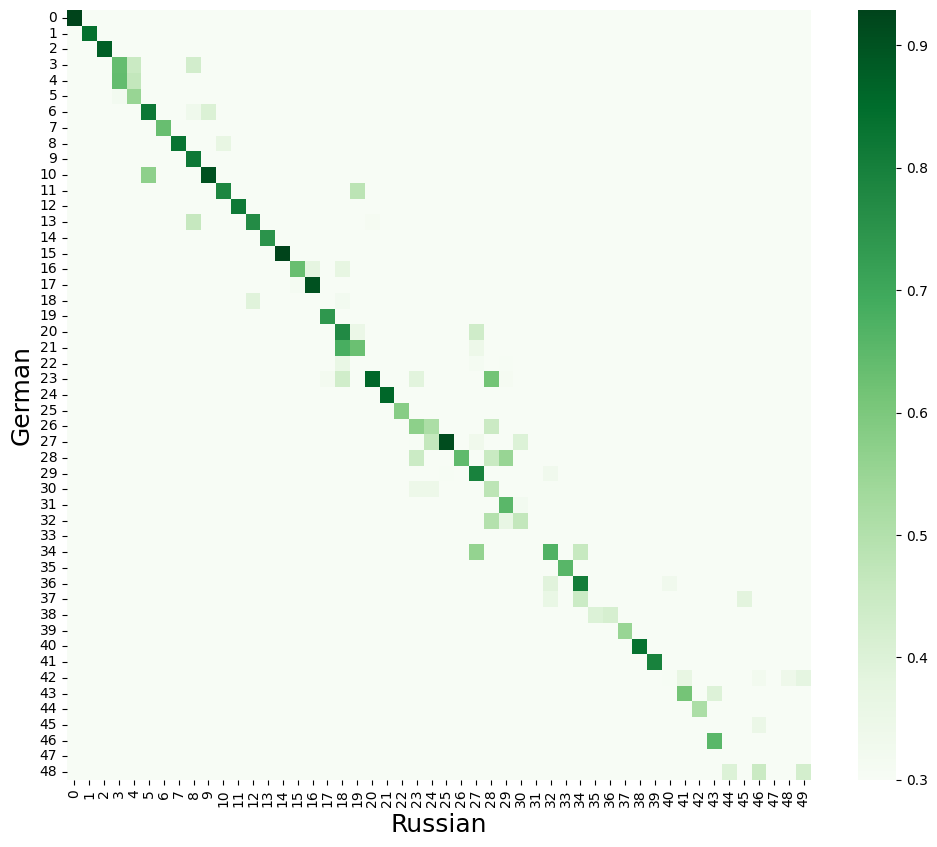

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(sim_matrix, cmap = "Greens", vmin = threshold)
plt.xlabel("Russian", fontsize = 18)
plt.ylabel("German", fontsize = 18)
plt.show()

## Выбираем лучшее совпадение

In [20]:
sim_matrix_best = np.zeros_like(sim_matrix)
sim_matrix_best[range(len(sim_matrix)), sim_matrix.argmax(1)] = sim_matrix[range(len(sim_matrix)), sim_matrix.argmax(1)]

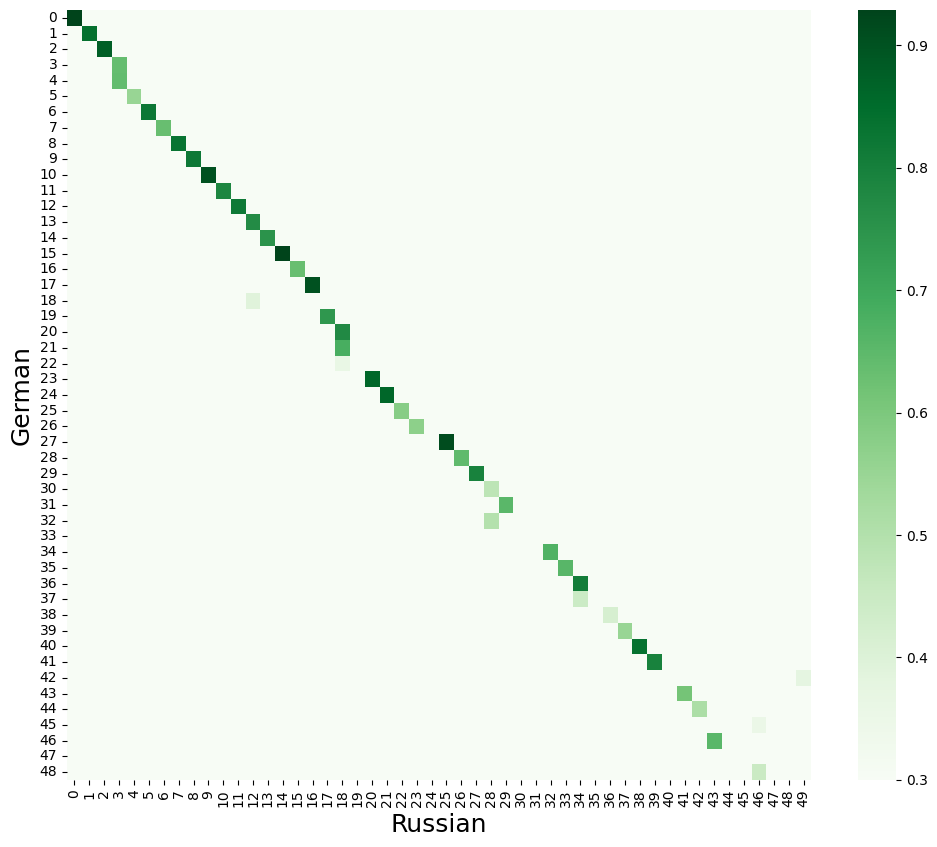

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(sim_matrix_best, cmap = "Greens", vmin = threshold)
plt.xlabel("Russian", fontsize=18)
plt.ylabel("German", fontsize=18)
plt.show()

## Смотрим на результат

In [27]:
def get_pairs(ru_lines, de_lines, sim_matrix, threshold):
    ru = []
    de = []
    sims = []
    for i in range(sim_matrix.shape[0]):
        for j in range(sim_matrix.shape[1]):
            if sim_matrix[i,j] >= threshold:
                ru.append(ru_lines[j])
                de.append(de_lines[i])
                sims.append(sim_matrix[i,j])
    return ru, de, sims

In [28]:
res_ru, res_de, sims = get_pairs(sent_ru, sent_de, sim_matrix_best, threshold)

In [ ]:
for x, y, s in zip(res_ru, res_de, sims):
    print(x)
    print(y)
    print("")
    print(">> similarity", s, "\n\n")

## Посмотрим на весь текст

In [31]:
vectors1, vectors2 = [], []

for lines_ru_batch, lines_de_batch in get_batch(sent_ru, sent_de, batch_size):
    batch_number += 1
    vectors1 = [*vectors1, *model_st.encode(lines_de_batch)]
    vectors2 = [*vectors2, *model_st.encode(lines_ru_batch)]

In [32]:
sim_matrix = get_sim_matrix(vectors1, vectors2, window)

In [33]:
sim_matrix_best = np.zeros_like(sim_matrix)
sim_matrix_best[range(len(sim_matrix)), sim_matrix.argmax(1)] = sim_matrix[range(len(sim_matrix)), sim_matrix.argmax(1)]

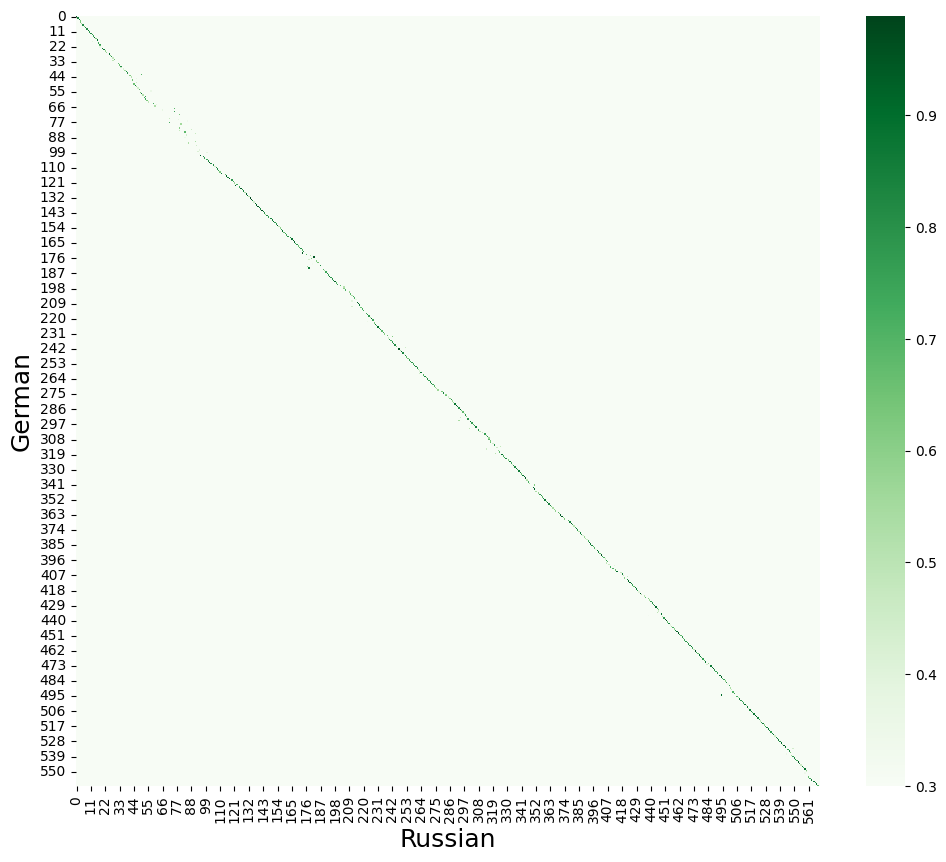

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(sim_matrix_best, cmap = "Greens", vmin = threshold)
plt.xlabel("Russian", fontsize=18)
plt.ylabel("German", fontsize=18)
plt.show()

In [37]:
res_ru, res_de, sims = get_pairs(sent_ru, sent_de, sim_matrix_best, threshold)

In [38]:
for x, y, s in zip(res_ru, res_de, sims):
    print(x)
    print(y)
    print("")
    print(">> similarity", s, "\n\n")

Небо  было желтым, как латунь; его еще не закоптило  дымом.
Der Himmel war gelb wie Messing und noch nicht verqualmt vom Rauch der Schornsteine.

>> similarity 0.9271129369735718 


За крышами фабрики оно светилось особенно сильно.
Hinter den Dächern der Fabrik leuchtete er sehr stark.

>> similarity 0.8388007879257202 


Вот—вот  должно было взойти солнце.
Die Sonne mußte gleich aufgehen.

>> similarity 0.8756905198097229 


Я посмотрел на часы — еще  не было восьми.
Ich sah nach der Uhr.

>> similarity 0.6386183500289917 


Я посмотрел на часы — еще  не было восьми.
Es war noch vor acht.

>> similarity 0.6391132473945618 


Я пришел  на  четверть часа раньше обычного.
Eine Viertelstunde zu früh.

>> similarity 0.5519730448722839 


Я открыл  ворота  и подготовил насос бензиновой  колонки.
Ich schloß das Tor auf und machte die Benzinpumpe fertig.

>> similarity 0.8210388422012329 


Всегда в это время уже подъезжали заправляться первые машины.
Um diese Zeit kamen immer schon ein paar 

## В чём могут быть проблемы?

1. **Литературный стиль**. Так как выравниваемые тексты являются художественной литературой, то не удивительно, что есть пропуски, — как мы помним, модель обучалась на Википедии, common crawling'е и новостях, а не на литературных корпусах.
2. **Авторский стиль**. В текстах могут встречаться придуманные автором или устаревшие слова, также часто могут встречаться жаргонизмы и разговорная лексика (например, уборщица фрау Штосс в начале романа, икая, все время повторяет nich вместо nicht).
3. **Стиль переводчика**. При переводе может не сохраняться синтаксическая структура, — одно предложение может быть переведено как два и наоборот. Это нормальная картина.
4. **Имена собственные**. Если имена Роберт, Готфрид, Отто и Патриция ещё куда ни шли, то фамилии Локамп, Ленц, Кёстер и Хольман модели сопоставить трудно. Все они "разбавляют" близость между векторами. Сюда же можно отнести любые редкие имена, названия организаций и географических объектов.
5. **Особенности языка**. У каждого языка есть свои "фишки". Немецкий язык известен своими склеивающимися словами и перескакивающими в конец приставками, зато порядок слов более-менее строгий. Русский очень богат морфологией, падежами (венгерский язык нервно засмеялся) и почти свободным порядком слов. В китайском нет пробелов и т.д.
